# Recommendation System

*Recommendation System* merupakan salah satu sistem yang mengacu pada prediksi sejumlah item atau data untuk pengguna dimasa mendatang. Salah satu alasan mengapa perlu digunakannya *Recommendation System* karena pengguna memiliki banyak pilihan untuk digunakan karena prevalensi internet.*Recommendation System* secara garis besar dibagi menjadi dua, yang dapat dilihat pada gambar berikut.
![Capture](recommend.JPG)

Recommendation System terbagi atas 3 metode :
<ul>
<li><a href="#cb">1. Content Based Recommendation</a></li>
<li><a href="#cf">2. Collaborative Filtering</a></li>
<li><a href="#hybrid">3. Content - Collaborative Recommendation (Hybrid Recommendation)</a></li>
</ul>

<a id='cb'></a>
## 1. Content Based Recommendation
>*Content Based Recommendation* memanfaatkan informasi beberapa item atau data untuk direkomendasikan kepada pengguna sebagai referensi yang terkait dengan informasi yang digunakan sebelumnya. Tujuan dari *Content Based Recommendation* agar dapat memprediksi persamaan dari sejumlah informasi yang didapat dari pengguna.

Data yang digunakan dalam mengaplikasikan metode *Content Based Recommendation* yaitu dengan menggunakan data yang terdiri 10 film dengan karakteristik atau feature-featurenya. Feature yang dimaksud yaitu adanya Jenis, Genre, Rating dan Duration. Pada data yang digunakan sudah memiliki variabel rating yang telah melalui proses min-max (normalisasi). Normalisasai dilakukan agar skala rating memiliki skala yang sama. Variabel hasil normalisasi pada data yaitu variabel Kode_Rating.

In [206]:
# Load Package
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [207]:
# Import Data
df_CB = pd.read_csv('D:/Python/Machine Learning/5. Association/Marketing Analytics/data/cb_data.csv',sep=';')
df_CB

,Movie,Jenis,Gendre,Rating,Kode_Rating,Duration
0,Avengers: End Game,Non Indo,Action,8.6,1.00,181
1,Ada Apa dengan Cinta 2,Indo,Horror,7.0,0.36,169
2,Aladdin,Non Indo,Animation,7.5,0.56,102
3,Gundala,Indo,Action,7.6,0.60,183
4,Captain Marvel,Non Indo,Adventure,6.1,1.00,102
5,Dua Garis Biru,Indo,Drama,7.5,0.56,112
6,Bumi Manusia,Indo,Drama,7.2,0.44,181
7,Dilan 1991,Indo,Drama,7.6,0.60,120
8,Spiderman: Far From Home,Non Indo,Action,6.8,0.28,137
9,The Lion King,Non Indo,Animation,7.7,0.64,118


In [208]:
df1=df_CB.set_index('Movie',1)

In [209]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Avengers: End Game to The Lion King
Data columns (total 5 columns):
Jenis          10 non-null object
Gendre         10 non-null object
Rating         10 non-null float64
Kode_Rating    10 non-null float64
Duration       10 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 480.0+ bytes


In [210]:
df2=df1.drop(['Duration','Kode_Rating'],1)

In [211]:
df2=pd.get_dummies(df2)

In [212]:
# Similar Matrix
SM=cosine_similarity(df2,df2)
SM

array([[1.        , 0.96720587, 0.98469301, 0.98493735, 0.97957582,
        0.96965953, 0.96824652, 0.97009501, 0.9991154 , 0.98517009],
       [0.96720587, 1.        , 0.96322168, 0.98176807, 0.95487026,
        0.98156876, 0.98090174, 0.98176807, 0.95966182, 0.96407066],
       [0.98469301, 0.96322168, 1.        , 0.96609892, 0.97821705,
        0.96566524, 0.96425804, 0.96609892, 0.98096097, 0.9999888 ],
       [0.98493735, 0.98176807, 0.96609892, 1.        , 0.95772255,
        0.98304802, 0.98232068, 0.9832664 , 0.98115319, 0.96695043],
       [0.97957582, 0.95487026, 0.97821705, 0.95772255, 1.        ,
        0.95729262, 0.95589763, 0.95772255, 0.97674779, 0.97853528],
       [0.96965953, 0.98156876, 0.96566524, 0.98304802, 0.95729262,
        1.        , 0.9999713 , 0.99999713, 0.96209634, 0.96651637],
       [0.96824652, 0.98090174, 0.96425804, 0.98232068, 0.95589763,
        0.9999713 , 1.        , 0.99995027, 0.96069434, 0.96510793],
       [0.97009501, 0.98176807, 0.9660989

> Berdasarkan Similar Matrix (SM) yang telah diperoleh, maka dapat divisualisasikan melalui Grafik Heatmap sebagai berikut. .  

In [213]:
content_based=pd.DataFrame(SM,index=df1.index,columns=df1.index)

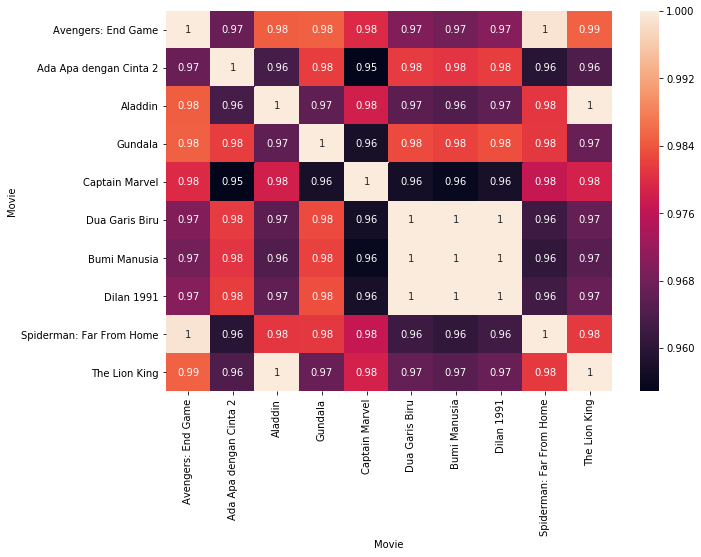

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(content_based,annot=True)

> Dikarenakan pada kasus yang digunakan yaitu list film dengan berbagai feature. Maka berdasarkan hasil Similar Matrix dapat diketahui rekomendasi film jika seseorang menonton salah satu film. Hasil Similar Matrix diperoleh berdasarkan feature-feature yang memiliki kemiripan. Dengan menggunakan Similar Matrix maka dapat diketahui bagaimana kedekatan antar feature, untuk memberikan rekomendasi suatu film berikutnya. Contoh rekomendasi yang diberikan untuk beberapa film adalah sebagai berikut.

In [215]:
Rekomendasi_movie=pd.DataFrame(content_based.iloc[:,1].sort_values(ascending=False))[1:].head(3)
Rekomendasi_movie

,Ada Apa dengan Cinta 2
Movie,
Dilan 1991,0.981768
Gundala,0.981768
Dua Garis Biru,0.981569


In [216]:
Rekomendasi_movie=pd.DataFrame(content_based.iloc[:,2].sort_values(ascending=False))[1:].head(3)
Rekomendasi_movie

,Aladdin
Movie,
The Lion King,0.999989
Avengers: End Game,0.984693
Spiderman: Far From Home,0.980961


> ** Kesimpulan : **
Jika dilihat berdasarkan output yang diberikan, maka dapat diketahui bahwa bagi orang yang menyukai Film "IT Chapter Two" maka film berikutnya yang direkomendasikan bagi orang tersebut yaitu Film "Habibie & Ainun", hal tersebut dikarekanan Film "IT Chapter Two" dan "Habibie & Ainun" memiliki nilai Cosine Similarity tertinggi yaitu 98%. Hal tersebut menandakan bahwa dengan menggunakan perhitungan Cosine Similarity mengetahui terdapat berbagai kemiripan antar kedua film tersebut. Hal tersebut juga dapat dilihat pada hasil output berikutnya, dimana pada saat menyukai Film "Frozen" maka akan direkomendasikan untuk menonton Film "Incredibles 2" dengan Cosine Smimilarity 99%. Dan film-film yang dapat direkomendasikan berikutnya dapat dilihat berdasarkan nilai Cosine Smimilarity terbesar berikutnya.  

<a id='cf'></a>
## 2. Collaborative Filtering

*Collaborative Filtering* atau *Crowd-Wisdom* merupakan salah satu metode rekomendasi yang menggunakan data rating dari seorang pengguna, dan pengguna lain untuk menghasilkan rekomendasi. *Collaborative filtering* menganggap bahwa selera pengguna terhadap suatu item atau barang akan cenderung sama dari waktu ke waktu. Ditambah lagi, pengguna yang menyukai suatu item biasanya juga akan menyukai item lain yang disukai oleh pengguna lain yang juga menyukai item yang sama dengan pengguna tersebut. 

In [217]:
# Load Package & Data
from math import sqrt
from cf_data import dataset

> Data yang digunakan dalam mengaplikasikan metode Collaborative Filtering yaitu dengan menggunakan data survey yang terdiri dari 24 responden dan memberikan penilaian pada sepuluh film. 10 Film tersebut diantaranya adalah :
1. Ada Apa dengan Cinta 2
2. Gundala
3. Dilan 1991
4. Bumi Manusia
5. Dua Garis Biru
6. Avengers: End Game
7. The Lion King
8. Aladdin
9. Spiderman: Far From Home
10. Captain Marvel
<br>

>Setiap responden diberikan kebebasan untuk menilai Film yang pernah di tonton. Untuk film yang tidak pernah ditonton maka responden dapat mengosongkan penilaiannya.

In [218]:
# Load the Algorithm
def similarity_score(person1,person2):

    # this Returns the ration euclidean distancen score of person 1 and 2

    # To get both rated items by person 1 and 2
    both_viewed = {}

    for item in dataset[person1]:
        if item in dataset[person2]:
            both_viewed[item] = 1
        
        # The Conditions to check if they both have common rating items
        if len(both_viewed) == 0:
            return 0

        # Finding Euclidean distance
        sum_of_eclidean_distance = []

        for item in dataset[person1]:
            if item in dataset[person2]:
                sum_of_eclidean_distance.append(pow(dataset[person1][item] - dataset[person2][item], 2))
        sum_of_eclidean_distance = sums(sum_of_eclidean_distance)
        
        return 1/(1+sqrt(sum_of_eclidean_distance))

def person_correlation(person1, person2):

   # To get both rated items
    both_rated = {}
    for item in dataset[person1]:
        if item in dataset[person2]:
            both_rated[item] = 1

    number_of_ratings = len(both_rated)

    # Checking for ratings in common
    if number_of_ratings == 0:
        return 0

    # Add up all the preferences of each user
    person1_preferences_sum = sum([dataset[person1][item] for item in both_rated])
    person2_preferences_sum = sum([dataset[person2][item] for item in both_rated])

    # Sum up the squares of preferences of each user
    person1_square_preferences_sum = sum([pow(dataset[person1][item],2) for item in both_rated])
    person2_square_preferences_sum = sum([pow(dataset[person2][item],2) for item in both_rated])

    # Sum up the product value of both preferences for each item
    product_sum_of_both_users = sum([dataset[person1][item] * dataset[person2][item] for item in both_rated])

    # Calculate the pearson score
    numerator_value = product_sum_of_both_users - (person1_preferences_sum*person2_preferences_sum/number_of_ratings)
    denominator_value = sqrt((person1_square_preferences_sum - pow(person1_preferences_sum,2)/number_of_ratings) * (person2_square_preferences_sum -pow(person2_preferences_sum,2)/number_of_ratings))

    if denominator_value == 0:
        return 0
    else:
        r = numerator_value / denominator_value
        return r

def most_similar_users(person, number_of_users):

    # returns the number_of_users (similar persons) for a given specific person
    scores = [(person_correlation(person, other_person), other_person) for other_person in dataset if other_person != person]

    # Sort the similar persons so the highest scores person will appear at the first
    scores.sort()
    scores.reverse()
    return scores[0:number_of_users]
        
def user_recommendations(person):

    # Gets recommendations for a person by using a weighted average of every other user's rankings
    totals = {}
    simSums = {}
    rankings_list =[]
    for other in dataset:
        # don't compare me to myself
        if other == person:
            continue
        sim = person_correlation(person,other)
        #print ">>>>>>>",sim

        # ignore scores of zero or lower
        if sim <=0: 
            continue
        for item in dataset[other]:

            # only score movies i haven't seen yet
            if item not in dataset[person] or dataset[person][item] == 0:

            # Similrity * score
                totals.setdefault(item,0)
                totals[item] += dataset[other][item]* sim
                # sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+= sim

        # Create the normalized list

    rankings = [(total/simSums[item],item) for item,total in totals.items()]
    rankings.sort()
    rankings.reverse()
    # returns the recommended items
    recommendataions_list = [recommend_item for score,recommend_item in rankings]
    return recommendataions_list
        

print(user_recommendations('ANI'))

['Avengers: End Game', 'Gundala', 'The Lion King', 'Dua Garis Biru']


In [219]:
print(user_recommendations('bunga'))

['Ada Apa dengan Cinta 2', 'Dua Garis Biru', 'Bumi Manusia']


In [220]:
print(person_correlation('ANI', 'bunga'))


-0.18601614150130796


> ** Kesimpulan : ** Rekomendasi Pengguna Dari hasil di atas, kita dapat melihat bahwa model memberikan rekomendasi film kepada pengguna, yang belum ditonton pengguna atau belum diberi peringkat. Rekomendasi ini diurutkan berdasarkan urutan penilaian tertinggi dari peringkat yang ada dari pengguna lain, yang memiliki peringkat yang sama dengan pengguna aktif atau pengguna yang telah ditonton dan diberi peringkat film. Dari hasil output di atas, model memberikan rekomendasi film untuk 'ANI' yaitu:
- End Game
- Gundala
- The Lion King
- Dua Garis Biru
<br>

Pearson Correlation Hubungan antara pengguna 'ANI' dan 'bunga' dalam peringkat film adalah -0,18; yang berarti bahwa nilai keduanya tidak akan meningkat satu sama lain dengan korelasi 0,18. Jika ingin melihat skor kesamaan ukuran tingkat kesamaan dapat dilihat berdasarkan Similarity Score.

<a id="#hybrid"></a>
# 3. Content - Collaborative Recommendation (Hybrid Recommendation)

Hybrid Recommendation System adalah gabungan antara metode content based filtering dengan collaborative filtering.

In [221]:
# Load Package
import pandas as pd
import numpy as np
from math import sqrt
from ratingfilm import dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [235]:
df_CF=pd.DataFrame(dataset)
df_CF

,ANI,AhokTemanFirli,Damar Teman Firli,Dpv,Febi ganteng gak ada obat,Genjeh,Hania,Indra 1991 SM,Indra Junior,Jawaharal,...,Putrisqiana,Rima,Romantika,Star,Topik Zulkarnain,bunga,faizah,franadek,jul,luck
Ada Apa dengan Cinta 2,4,0,5,5,4,5,3,0,4,2,...,4,5,5,4,0,0,3,4,0,3
Aladdin,4,0,0,0,5,5,0,0,5,5,...,0,5,0,5,0,5,0,5,3,0
Avengers: End Game,0,3,5,5,5,5,0,0,5,5,...,5,5,0,5,5,5,5,5,3,4
Bumi Manusia,5,0,0,0,0,0,4,0,0,0,...,4,4,0,0,0,0,5,5,0,0
Captain Marvel,4,4,0,5,4,4,0,0,5,4,...,3,5,0,5,2,5,0,4,3,2
Dilan 1991,4,0,0,4,4,3,4,0,0,3,...,2,5,5,0,0,4,5,4,0,0
Dua Garis Biru,0,0,0,0,0,0,4,0,4,5,...,3,3,0,0,0,0,4,3,3,0
Gundala,0,0,0,4,3,4,5,5,0,4,...,3,5,0,4,0,4,0,4,3,0
Spiderman: Far From Home,3,0,5,5,5,4,0,0,5,5,...,4,5,0,0,4,5,0,4,3,0
The Lion King,0,0,0,0,0,0,0,0,5,4,...,0,4,0,5,5,5,0,4,3,0


In [223]:
df_CB

,Movie,Jenis,Gendre,Rating,Kode_Rating,Duration
0,Avengers: End Game,Non Indo,Action,8.6,1.00,181
1,Ada Apa dengan Cinta 2,Indo,Horror,7.0,0.36,169
2,Aladdin,Non Indo,Animation,7.5,0.56,102
3,Gundala,Indo,Action,7.6,0.60,183
4,Captain Marvel,Non Indo,Adventure,6.1,1.00,102
5,Dua Garis Biru,Indo,Drama,7.5,0.56,112
6,Bumi Manusia,Indo,Drama,7.2,0.44,181
7,Dilan 1991,Indo,Drama,7.6,0.60,120
8,Spiderman: Far From Home,Non Indo,Action,6.8,0.28,137
9,The Lion King,Non Indo,Animation,7.7,0.64,118


In [224]:
df_CB1 = df_CB.drop(['Jenis','Rating','Kode_Rating','Duration'],1)
df_CB1

,Movie,Gendre
0,Avengers: End Game,Action
1,Ada Apa dengan Cinta 2,Horror
2,Aladdin,Animation
3,Gundala,Action
4,Captain Marvel,Adventure
5,Dua Garis Biru,Drama
6,Bumi Manusia,Drama
7,Dilan 1991,Drama
8,Spiderman: Far From Home,Action
9,The Lion King,Animation


In [225]:
df_CB2 = df_CB.set_index('Movie',1)
df_CB2

,Jenis,Gendre,Rating,Kode_Rating,Duration
Movie,,,,,
Avengers: End Game,Non Indo,Action,8.6,1.00,181
Ada Apa dengan Cinta 2,Indo,Horror,7.0,0.36,169
Aladdin,Non Indo,Animation,7.5,0.56,102
Gundala,Indo,Action,7.6,0.60,183
Captain Marvel,Non Indo,Adventure,6.1,1.00,102
Dua Garis Biru,Indo,Drama,7.5,0.56,112
Bumi Manusia,Indo,Drama,7.2,0.44,181
Dilan 1991,Indo,Drama,7.6,0.60,120
Spiderman: Far From Home,Non Indo,Action,6.8,0.28,137


In [226]:
def content_based(person,min_content_score):
    
    k=0
    not_watch=[]
    for i in df_CF[person]:
        if i==0:
            not_watch.append(df_CF.index[k])
            k=k+1
        else:
            k=k+1
    
    tf = TfidfVectorizer(analyzer='word',
                             ngram_range=(1, 3),
                             min_df=0,
                             stop_words='english')
    tfidf_matrix=tf.fit_transform(df_CB1['Gendre'])
    cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
    
    hasilbaru=pd.DataFrame(cosine_similarities,index=df_CB1['Movie'],columns=df_CB1['Movie'])
    
    hasilfinal=pd.DataFrame(hasilbaru[not_watch].mean().sort_values(ascending=False),columns=['Score'])
    hasilfinal1=hasilfinal[hasilfinal.Score>=min_content_score]
    indeks=hasilfinal1.index
    
    return indeks

In [227]:
def person_correlation(person1, person2):

   # To get both rated items
    both_rated = {}
    for item in dataset[person1]:
        if item in dataset[person2]:
            both_rated[item] = 1

    number_of_ratings = len(both_rated)

    # Checking for ratings in common
    if number_of_ratings == 0:
        return 0

    # Add up all the preferences of each user
    person1_preferences_sum = sum([dataset[person1][item] for item in both_rated])
    person2_preferences_sum = sum([dataset[person2][item] for item in both_rated])

    # Sum up the squares of preferences of each user
    person1_square_preferences_sum = sum([pow(dataset[person1][item],2) for item in both_rated])
    person2_square_preferences_sum = sum([pow(dataset[person2][item],2) for item in both_rated])

    # Sum up the product value of both preferences for each item
    product_sum_of_both_users = sum([dataset[person1][item] * dataset[person2][item] for item in both_rated])

    # Calculate the pearson score
    numerator_value = product_sum_of_both_users - (person1_preferences_sum*person2_preferences_sum/number_of_ratings)
    denominator_value = sqrt((person1_square_preferences_sum - pow(person1_preferences_sum,2)/number_of_ratings) * (person2_square_preferences_sum -pow(person2_preferences_sum,2)/number_of_ratings))

    if denominator_value == 0:
        return 0
    else:
        r = numerator_value / denominator_value
        return r

In [228]:
def user_recommendations(person,min_content_score):

    # Gets recommendations for a person by using a weighted average of every other user's rankings
    totals = {}
    simSums = {}
    rankings_list =[]
    for other in dataset:
        # don't compare me to myself
        if other == person:
            continue
        sim = person_correlation(person,other)
        #print ">>>>>>>",sim

        # ignore scores of zero or lower
        if sim <=0: 
            continue
        for item in dataset[other]:

            # only score movies i haven't seen yet
            if item not in dataset[person] or dataset[person][item] == 0:

            # Similrity * score
                totals.setdefault(item,0)
                totals[item] += dataset[other][item]* sim
                # sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+= sim

        # Create the normalized list

    rankings = [(total/simSums[item],item) for item,total in totals.items()]
    rankings.sort()
    rankings.reverse()
    # returns the recommended items
    recommendataions_list = [recommend_item for score,recommend_item in rankings]
    

    new_rankings=[]
    for i in rankings:
        if i[1] in content_based(person,min_content_score):
            new_rankings.append(i)
        
    return new_rankings

In [229]:
def hybrid_filtering(person,min_content_score):
    content_based(person,min_content_score)
    return user_recommendations(person,min_content_score)

In [236]:
hybrid_filtering('ANI',0.2)

[(3.865092110388115, 'Avengers: End Game'),
 (2.8772750234201343, 'Gundala'),
 (1.5884943058284624, 'The Lion King'),
 (1.4238122452049977, 'Dua Garis Biru')]

> **Kesimpulan :** Dari data df_CF dan df_CB dapat merekomendasikan Film yang lebih complete. Hal ini dikarenakna rekomendasikan yang dihasilkan untuk setiap individu dilihat berdasarkan dua data yang berbeda. Berdasarkan data df_CF, diketahui ANI belum menonton beberapa film. Dengan menggunakan metode Hybrid filtering Algorithm, ANI akan mendapatkan recommend untuk menonton Film berikutnya. Dengan menggunakan metode Hybrid, maka dapat diketahui score rekomendasi untuk setiap film.